In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [247]:
train, valid, test = pd.read_csv("data/ds5_train.csv"), pd.read_csv("data/ds5_valid.csv"), pd.read_csv("data/ds5_test.csv")

In [248]:
display(train.head())

,x_1,y
0,-4.029750,-0.420076
1,-2.524577,0.205268
2,2.794617,0.773794
3,1.695904,0.210476
4,-1.458392,0.858475


In [249]:
X_train= train["x_1"].to_numpy()
y_train= train["y"].to_numpy()
X_valid= valid["x_1"].to_numpy()
y_valid= valid["y"].to_numpy()
X_test= test["x_1"].to_numpy()
y_test= test["y"].to_numpy()

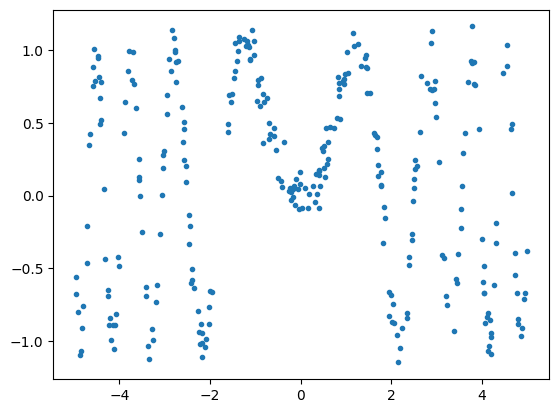

In [250]:
plt.plot(X_train, y_train, '.')
plt.show()

In [251]:
class LocallyWeightedRegression:
    def train_model(self, X_train, y_train, tau):
        self.X_train = X_train
        self.y_train = y_train
        self.X_aug = np.column_stack([np.ones(len(X_train)), X_train])
        self.tau = tau
    #creates the weight matrix depending on which x value we're looking at
    def weight_matrix(self, x_aug: np.ndarray) -> np.ndarray:
        z = self.X_aug - x_aug
        weights = np.exp(-1/(2*self.tau**2) * np.linalg.norm(z, axis=1)**2)
        return np.diag(weights)
    #calculates theta depending on which x we're looking at (implicitly inside the weight_matrix)
    def theta(self, weight_matrix: np.ndarray, y: np.ndarray) -> np.ndarray:
        X=self.X_aug
        return np.linalg.solve(X.T @ weight_matrix @ X, X.T @ weight_matrix @ y)
    #the x we're looking at are the rows 
    def make_prediction(self, x: np.ndarray):
        x_aug = np.hstack((1, x))
        W = self.weight_matrix(x_aug)
        theta = self.theta(W, self.y_train)
        return np.dot(theta, x_aug)
    
    def test(self, X_test):
        y_pred = np.zeros(len(X_test))
        for i in range(0, len(y_pred)):
            if X_test.ndim == 1:
                y_pred[i] = self.make_prediction(X_test[i])
            else: 
                y_pred[i] = self.make_prediction(X_test[i,:])
        return y_pred

localreg = LocallyWeightedRegression()

In [252]:
localreg.train_model(X_train, y_train, tau=0.05)

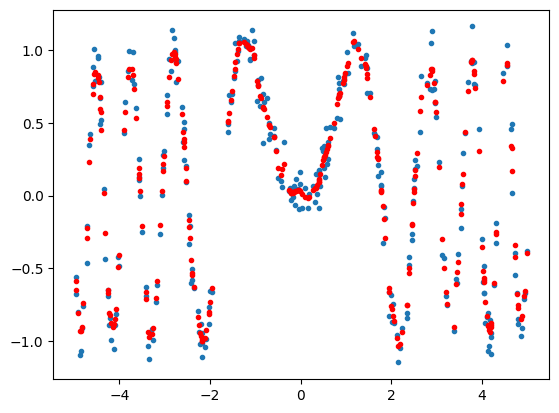

In [253]:
y_train_pred = localreg.test(X_train)
plt.plot(X_train, y_train, '.')
plt.plot(X_train, y_train_pred, '.', color = 'red')
plt.show()

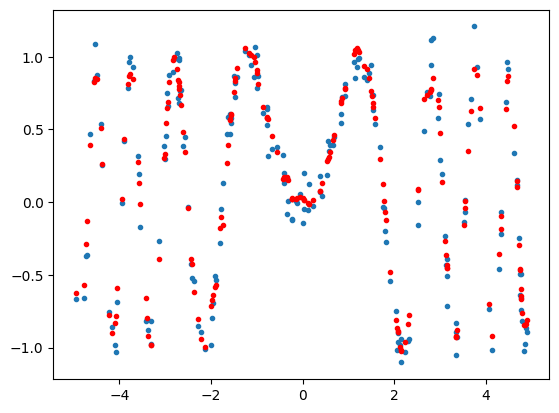

0.012400076150485113


In [254]:
from sklearn.metrics import mean_squared_error
y_valid_pred = localreg.test(X_valid)
plt.plot(X_valid, y_valid, '.')
plt.plot(X_valid, y_valid_pred, '.', color ='red')
plt.show()
MSE = mean_squared_error(y_valid, y_valid_pred)
print(MSE)

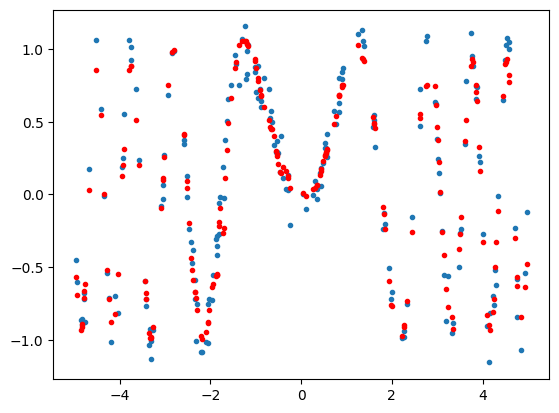

0.016990143386882428


In [ ]:
y_test_pred = localreg.test(X_test)
plt.plot(X_test, y_test, '.')
plt.plot(X_test, y_test_pred, '.', color ='red')
plt.show()
MSE = mean_squared_error(y_test, y_test_pred)
print(MSE)
# tau = 0.05 - looks to be the best.